<IPython.core.display.Javascript object>


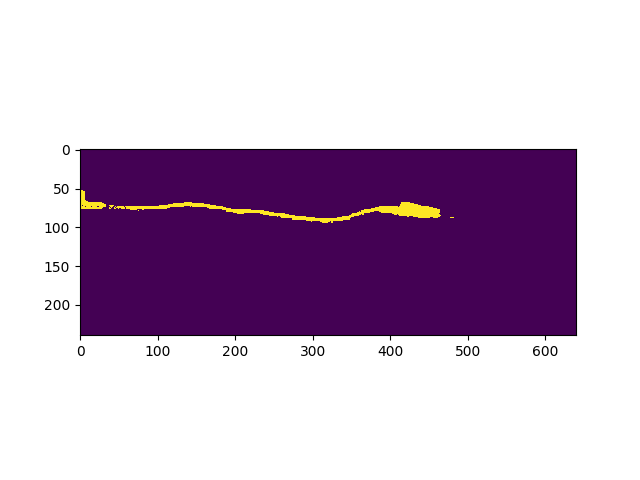

In [1]:
import numpy as np
import cv2
%matplotlib notebook
import matplotlib.pyplot as plt

#import mylib		#sucht mylib.py und führt es aus
#die Suche wird durchgeführt in:
#import sys
#sys.path



video_capture = cv2.VideoCapture(0)         # -1: zufällige Kamera auswählen 
#video_capture.set(3, 640)                    # Breite des Bildes festlegen
#video_capture.set(4, 480)                    # Höhe des Bildes festlegen


ret, frame = video_capture.read()        # Video capturen

crop_img = frame[240:480,0:640]

hsv_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV)

lower_pink = np.array([0,50,50])                      
upper_pink = np.array([10,255,255])
    
mask = cv2.inRange(hsv_img, lower_pink, upper_pink)

plt.figure()
plt.imshow(mask)

